In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPool2D,BatchNormalization

with open('speaker_data.json', "r") as file:
    data = json.load(file)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) 

In [2]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [3]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5)

model = Sequential()


model.add(Conv2D(32,kernel_size=(5,5),input_shape=(X_train.shape[1],X_train.shape[2],1),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 13, 32)         832       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 13, 32)         128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

In [6]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=16,
                    epochs=100,
                    verbose=2,
                    callbacks=[rlrop])

Epoch 1/100
2110/2110 - 11s - loss: 0.3978 - accuracy: 0.8577 - val_loss: 0.2624 - val_accuracy: 0.9123 - lr: 0.0100
Epoch 2/100
2110/2110 - 11s - loss: 0.2387 - accuracy: 0.9195 - val_loss: 0.1814 - val_accuracy: 0.9369 - lr: 0.0100
Epoch 3/100
2110/2110 - 11s - loss: 0.2022 - accuracy: 0.9332 - val_loss: 0.1462 - val_accuracy: 0.9484 - lr: 0.0100
Epoch 4/100
2110/2110 - 11s - loss: 0.1745 - accuracy: 0.9419 - val_loss: 0.1691 - val_accuracy: 0.9413 - lr: 0.0100
Epoch 5/100
2110/2110 - 11s - loss: 0.1567 - accuracy: 0.9483 - val_loss: 0.1118 - val_accuracy: 0.9623 - lr: 0.0100
Epoch 6/100
2110/2110 - 11s - loss: 0.1447 - accuracy: 0.9518 - val_loss: 0.1165 - val_accuracy: 0.9625 - lr: 0.0100
Epoch 7/100
2110/2110 - 11s - loss: 0.1398 - accuracy: 0.9547 - val_loss: 0.0954 - val_accuracy: 0.9677 - lr: 0.0100
Epoch 8/100
2110/2110 - 11s - loss: 0.1260 - accuracy: 0.9591 - val_loss: 0.0937 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 9/100
2110/2110 - 11s - loss: 0.1188 - accuracy: 0.9614 - 

Epoch 70/100
2110/2110 - 12s - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0604 - val_accuracy: 0.9832 - lr: 1.0000e-08
Epoch 71/100
2110/2110 - 12s - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0603 - val_accuracy: 0.9831 - lr: 1.0000e-08
Epoch 72/100
2110/2110 - 12s - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0604 - val_accuracy: 0.9832 - lr: 1.0000e-08
Epoch 73/100
2110/2110 - 12s - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0603 - val_accuracy: 0.9832 - lr: 1.0000e-08
Epoch 74/100
2110/2110 - 12s - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0604 - val_accuracy: 0.9833 - lr: 1.0000e-09
Epoch 75/100
2110/2110 - 12s - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0603 - val_accuracy: 0.9831 - lr: 1.0000e-09
Epoch 76/100
2110/2110 - 12s - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0604 - val_accuracy: 0.9829 - lr: 1.0000e-09
Epoch 77/100
2110/2110 - 11s - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0601 - val_accuracy: 0.9829 - lr: 1.0000e-09
Epoch 78/100
2110/2110 -

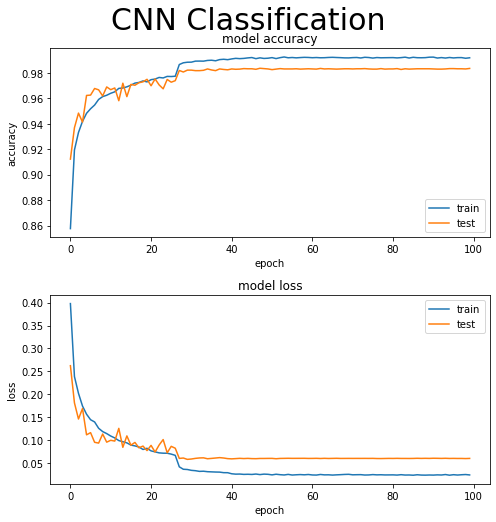

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('CNN Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import classification_report
labelNames = ['Jens_Stoltenberg','Margaret_Thatcher','Julia_Gillard','Nelson_Mandela','Benjamin_Netanyahu']
predictions = model.predict(X_test, batch_size=32)

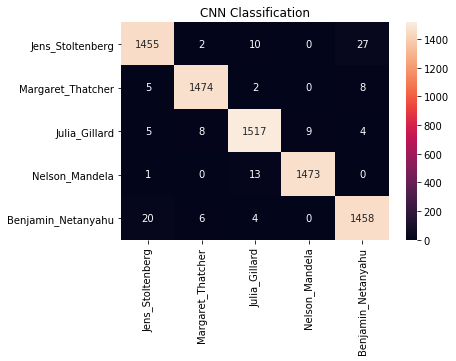

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1))
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('CNN Classification');

In [11]:
98.35

98.35

In [7]:
model.save('speaker-recog-cnn.h5')